In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

# Implement example hh

In [ ]:
input = tf.convert_to_tensor([[
    [1.0, 3.0, 2.0, 1.0],
    [0.0, 4.0, 1.0, 2.0]
]])

In [ ]:
simple_rnn = tf.keras.layers.SimpleRNN(3,
                                       return_sequences=True,
                                       return_state=True)

In [ ]:
simple_rnn(input)

[<tf.Tensor: shape=(1, 2, 3), dtype=float32, numpy=
 array([[[ 0.99662256, -0.99433047,  0.9122257 ],
         [ 0.8788173 , -0.95501816,  0.64041   ]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.8788173 , -0.95501816,  0.64041   ]], dtype=float32)>]

In [ ]:
print("Sequence Output: \n", sequence_output.numpy())
print("Final State: \n", state.numpy())

# Check Param

In [ ]:
input = keras.Input(shape = (5,), dtype = 'int32')
x = keras.layers.Embedding(100, 4)(input)

# Add simpleRNN
x = keras.layers.SimpleRNN(3)(x)

# Add a classifer
output = keras.layers.Dense(1, activation = 'sigmoid')(x)

model = keras.Model(input, output)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5)]               0         
                                                                 
 embedding_2 (Embedding)     (None, 5, 4)              400       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 3)                 24        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 428 (1.67 KB)
Trainable params: 428 (1.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
input = keras.Input(shape = (5,), dtype = 'int32')
x = keras.layers.Embedding(100, 4)(input)

# Add simpleRNN
x = keras.layers.SimpleRNN(3, return_sequences= True)(x)
x = keras.layers.SimpleRNN(3)(x)

# Add a classifer
output = keras.layers.Dense(1, activation = 'sigmoid')(x)

model = keras.Model(input, output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 5)]               0         
                                                                 
 embedding_3 (Embedding)     (None, 5, 4)              400       
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 5, 3)              24        
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 3)                 21        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 449 (1.75 KB)
Trainable params: 449 (1.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# ...

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# 20k words xuất hiện nhiều nhất
max_features = 20000
embedding_data = 128
maxlen = 500

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

17464789/17464789 [==============================] - 1s 0us/step
25000 Training sequences
25000 Validation sequences


In [ ]:
inputs = keras.Input(shape=(maxlen,), dtype="int32")

# Embed each integer in a 128-dimenaional vector
x = layers.Embedding(max_features, embedding_data)(inputs)

# Add 2 simple RNN
x = layers.SimpleRNN(64, return_sequences=True)(x)
x = layers.SimpleRNN(64)(x)

# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 128)          2560000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 500, 64)           12352     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2580673 (9.84 MB)
Trainable params: 2580673 (9.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",
              loss="binary_crossentropy", metrics=["acc"])
history = model.fit(x_train, y_train,
                    batch_size = 512,
                    epochs = 50, validation_data=(x_val, y_val))

Epoch 1/50
49/49 [==============================] - 56s 1s/step - loss: 0.6227 - acc: 0.6330 - val_loss: 0.4440 - val_acc: 0.7950
Epoch 2/50
49/49 [==============================] - 64s 1s/step - loss: 0.2987 - acc: 0.8758 - val_loss: 0.3177 - val_acc: 0.8698
Epoch 3/50
49/49 [==============================] - 60s 1s/step - loss: 0.1281 - acc: 0.9563 - val_loss: 0.3734 - val_acc: 0.8468
Epoch 4/50
49/49 [==============================] - 50s 1s/step - loss: 0.0347 - acc: 0.9923 - val_loss: 0.4547 - val_acc: 0.8568
Epoch 5/50
49/49 [==============================] - 53s 1s/step - loss: 0.0105 - acc: 0.9984 - val_loss: 0.5341 - val_acc: 0.8472
Epoch 6/50
49/49 [==============================] - 50s 1s/step - loss: 0.0028 - acc: 0.9998 - val_loss: 0.6029 - val_acc: 0.8593
Epoch 7/50
49/49 [==============================] - 50s 1s/step - loss: 8.9244e-04 - acc: 1.0000 - val_loss: 0.6334 - val_acc: 0.8548
Epoch 8/50
49/49 [==============================] - 49s 1s/step - loss: 5.5344e-04 - a

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

<Figure size 1000x1000 with 0 Axes>

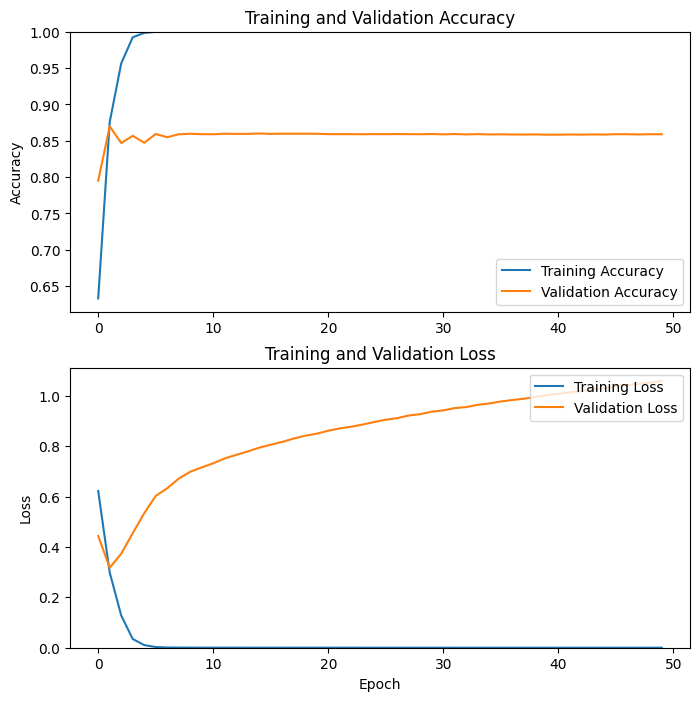

In [ ]:
import matplotlib.pyplot as plt

# Kích thước của hình vẽ
plt.figure(figsize=(10, 10))

# Lấy các giá trị lịch sử của accuracy và loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Tạo hình vẽ cho accuracy và loss
plt.figure(figsize=(8, 8))

# Vẽ biểu đồ độ chính xác
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

# Vẽ biểu đồ tổn thất
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')

# Hiển thị hình vẽ
plt.show()
